In [1]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = sq.datasets.visium_fluo_image_crop()

In [3]:
crop = img.crop_corner(1000, 1000, size=1000)

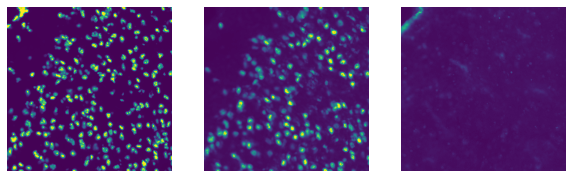

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 20))
for i, ax in enumerate(axes):
    crop.show("image", channel=i, ax=ax)

In [5]:
sq.im.segment(img=crop, layer="image", channel=0, method="watershed", thresh=None, geq=True)

ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_watershed']]
Number of segments in crop: 567


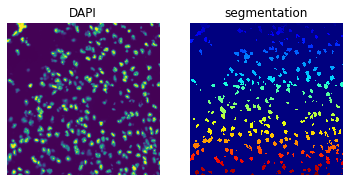

In [6]:
print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_watershed']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_watershed", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")

# Cellpose

In [7]:
from cellpose import models

In [8]:
def custom_model(img, mode='nuclei'):
    model = models.Cellpose(model_type=mode)
    res, _, _, _ = model.eval(img, channels=[0])
    return res

In [9]:
sq.im.segment(img=crop, layer="image", method=custom_model, mode='cyto')

ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_custom', 'segmented_watershed']]
Number of segments in crop: 316


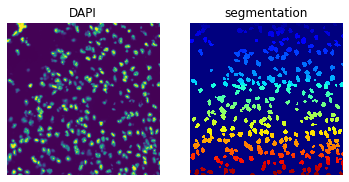

In [10]:
print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_custom']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_custom", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")

In [11]:
sq.im.segment(img=crop, layer="image", method=custom_model, mode='nuclei')

ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_custom', 'segmented_watershed']]
Number of segments in crop: 303


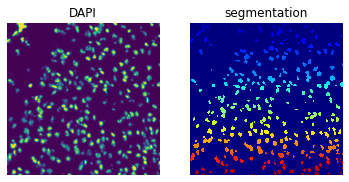

In [12]:
print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_custom']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_custom", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")